## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

**Nome** : João Pedro da Silva Lima

**Relatório**:
    
    Os dados explorados do Enem apresentam uma boa consistência, sem outliers e comportamentos irregulares, facilitando o trabalho de amostragem e as tomadas de decisão. Ao explorar as questões, percebemos que os dados de fato podem ser utilizados para fazermos boas previsões tanto na tarefa de classificação como na de regressão. Por fim, podemos concluir que a tarefa proposta pode ser explorada em um contexto real com um bom nível de satisfação. 

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [11]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np
import matplotlib.pyplot as plt

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 1.0.1
Usando seaborn 0.10.0
Usando scipy 1.4.1
Usando yellowbrick 1.1
Usando numpy 1.18.1


In [12]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [13]:
# solução
enem = pd.read_csv( "./input/MICRODADOS_ENEM_2017.csv", sep = ';', encoding='iso-8859-1',
                  usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", 
                           "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", 
                           "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"] )


In [14]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [15]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [16]:
# solução
todas_as_notas = ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
                 'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']

In [17]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [18]:
# solução
enem = enem.dropna()
enem['NU_NOTA_MT'].head()

0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [19]:
# solução e impressão
enem['nota_total'] = enem.sum(axis = 1)
enem['nota_total'].head()

0   2681.400
3   2949.500
4   2786.700
5   2795.000
6   2858.500
Name: nota_total, dtype: float64

 Média das notas: 2592.747
 Mediana das notas: 2569.300
 Desvio padrão 395.990

 A distribuição é aparentemente normal com uma ligeira assimetria à direita.


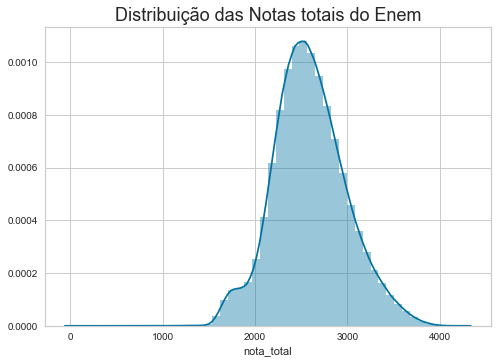

In [20]:

media = enem['nota_total'].mean()
mediana = enem['nota_total'].median()
std = enem['nota_total'].std()
print( " Média das notas: {:.3f}\n Mediana das notas: {:.3f}\n Desvio padrão {:.3f}\n".format( media, mediana, std ) )
print( " A distribuição é aparentemente normal com uma ligeira assimetria à direita.")

ax = sns.distplot(enem['nota_total'])
ax.set_title("Distribuição das Notas totais do Enem", fontsize = 18)
plt.show()

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição


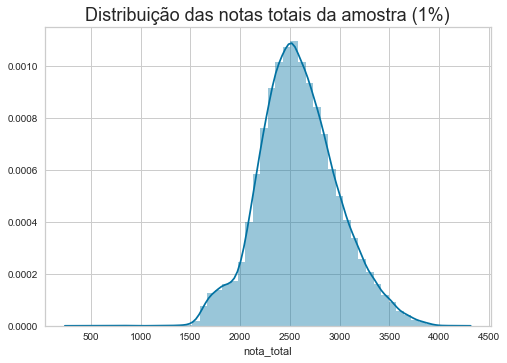

Tamanho da amostra 44267
 Média das notas: 2590.625
 Mediana das notas: 2566.100
 Desvio padrão 396.113

Os dados da amostra de 1% se comportam de forma muito semelhante aos dados totais sendo, portanto, representativos


In [21]:
import matplotlib.pyplot as plt

# solução sua função de sampling

def eda_sample(enem):
    SEED = 745
    enem_eda = enem.sample( n = int(0.01*len(enem)) )
    print("Enem EDA sampling tem a distribuição")
    
    # descreva a nota_total
    media = enem_eda['nota_total'].mean()
    mediana = enem_eda['nota_total'].median()
    std = enem_eda['nota_total'].std()
    
    # plote o histograma da nota_total e mostre com plt.show()
    ax = sns.distplot(enem_eda['nota_total'])
    ax.set_title( "Distribuição das notas totais da amostra (1%)", fontsize = 18 )
    plt.show()
    
    print( "Tamanho da amostra {:d}".format(len(enem_eda)))
    print( " Média das notas: {:.3f}\n Mediana das notas: {:.3f}\n Desvio padrão {:.3f}\n".format( media, mediana, std ) )
    
    return enem_eda

enem_eda = eda_sample(enem)
print("Os dados da amostra de 1% se comportam de forma muito semelhante aos dados totais sendo, portanto, representativos")

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [22]:
# solução
if "nota_total" not in todas_as_notas:
    todas_as_notas.append("nota_total")
    
todas_as_notas
correlacoes = enem_eda.corr()

In [23]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")
    
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.609,0.569,0.548,0.347,0.319,0.390,0.384,0.354,0.732
NU_NOTA_CH,0.609,1.000,0.708,0.569,0.402,0.354,0.434,0.424,0.389,0.792
NU_NOTA_LC,0.569,0.708,1.000,0.542,0.448,0.370,0.456,0.447,0.397,0.777
NU_NOTA_MT,0.548,0.569,0.542,1.000,0.358,0.325,0.395,0.390,0.353,0.759
NU_NOTA_COMP1,0.347,0.402,0.448,0.358,1.000,0.774,0.834,0.863,0.598,0.729
NU_NOTA_COMP2,0.319,0.354,0.370,0.325,0.774,1.000,0.859,0.798,0.631,0.693
NU_NOTA_COMP3,0.390,0.434,0.456,0.395,0.834,0.859,1.000,0.868,0.678,0.774
NU_NOTA_COMP4,0.384,0.424,0.447,0.390,0.863,0.798,0.868,1.000,0.656,0.762
NU_NOTA_COMP5,0.354,0.389,0.397,0.353,0.598,0.631,0.678,0.656,1.000,0.677
nota_total,0.732,0.792,0.777,0.759,0.729,0.693,0.774,0.762,0.677,1.000


Text(0.5, 1, 'Mapa de correlação entre as notas do Enem')

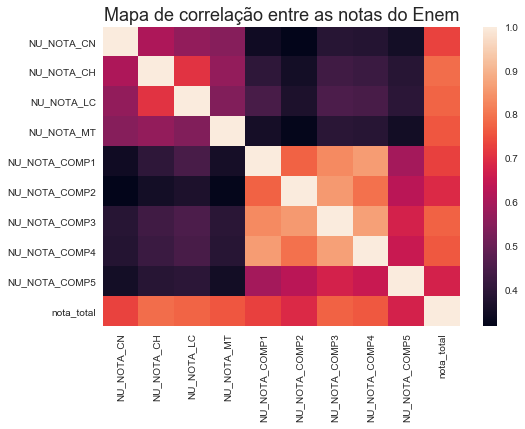

In [24]:
ax = sns.heatmap( correlacoes )
ax.set_title("Mapa de correlação entre as notas do Enem", fontsize = 18)

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [25]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes["nota_total"]

In [26]:
print(correlacao_com_nota_total)

NU_NOTA_CN      0.732
NU_NOTA_CH      0.792
NU_NOTA_LC      0.777
NU_NOTA_MT      0.759
NU_NOTA_COMP1   0.729
NU_NOTA_COMP2   0.693
NU_NOTA_COMP3   0.774
NU_NOTA_COMP4   0.762
NU_NOTA_COMP5   0.677
nota_total      1.000
Name: nota_total, dtype: float64


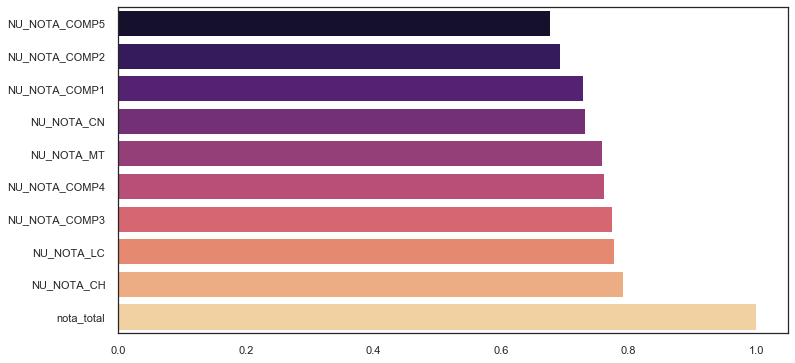

In [27]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = dados.sort_values()
    sns.barplot(y=corr.index, x=corr.values, palette = "magma")
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [28]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
notas = ['NU_NOTA_MT', 'NU_NOTA_LC', 'nota_total'] 
interesse = enem_eda[ notas ]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
3123510,465.500,482.900,2816.600
3677598,445.800,433.800,2215.400
902327,544.400,427.700,2401.400
4676387,480.900,505.800,2581.700
5214573,491.300,498.900,2543.600


In [29]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    # seed
    SEED = 42367
    
    # train_test_split
    notas = list(dados.columns)
    notas.remove('nota_total')
    X = dados[ notas ]
    y = dados['nota_total']
    train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=SEED)
    
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [30]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 2) (33200,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 402.6121907700537


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    model = LinearRegression()
    model.fit(train_x, train_y)
    
    # calcule o r2_score com os dados de teste
    r2_score = model.score(test_x, test_y)
    
    # calcule a predição e os dois tipos de erros
    
    test_pred = model.predict( test_x )
    mse = mean_squared_error( test_pred, test_y )
    mae = mean_absolute_error( test_pred, test_y )
    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [33]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.773181362030614
mse 36763.20244709903
mae 143.33665862519393


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

    O modelo treinado nos devolveu um erro médio absoluto relativamente menor que o desvio padão, o que pode indicar uma boa adequação aos dados e a geração de resultados mais consistentes.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

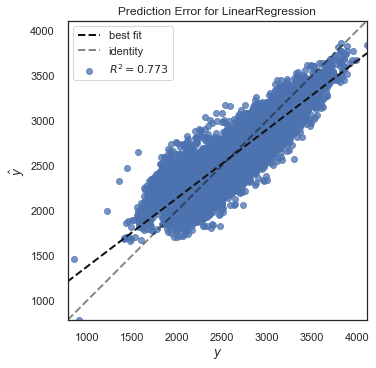

In [34]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

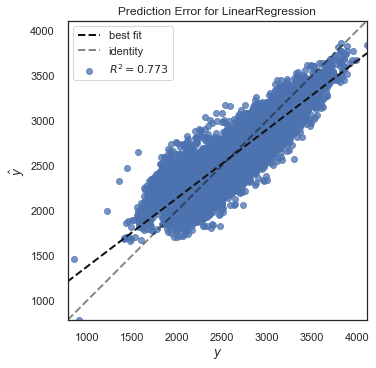

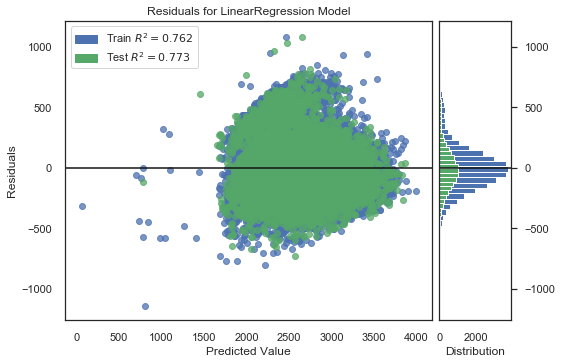

In [35]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [36]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

Com todas as notas o erro do modelo é de fato 0, já que a nota final é uma simples soma de todas as outras notas

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 9) (33200,) (11067, 9) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 402.6121907700537
********************************************************************************
r2 score 1.0
mse 1.8217901824483402e-25
mae 3.1653982267587207e-13


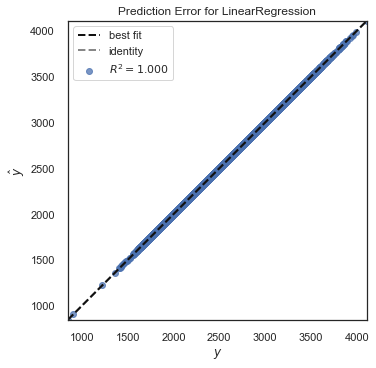

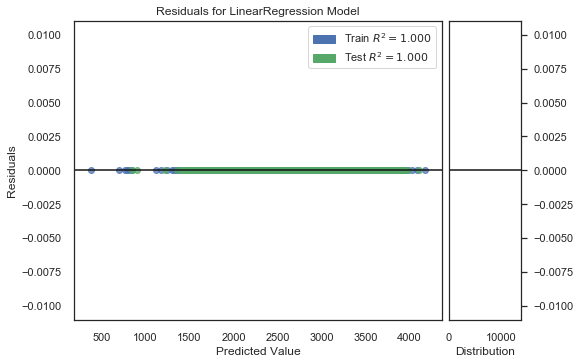

In [37]:
# solução 1: teste com todas as notas

notas = ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
            'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5', 'nota_total']
regressao_completa_para(notas)
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total



Com 8 notas escolhemos descartar a nota que possui menos correlação com a nota final, a **NU_NOTA_COMP_5**, e encontramos os seguintes resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 8) (33200,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'] como X
Desvio padrão do conjunto de testes 402.6121907700537
********************************************************************************
r2 score 0.9931706994135171
mse 1106.9062149418712
mae 26.16400737874858


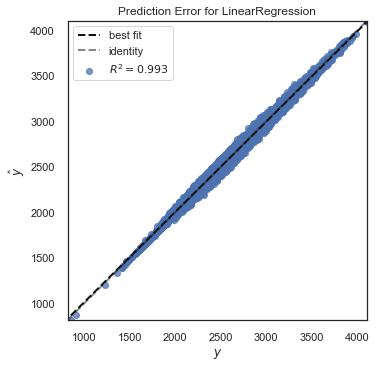

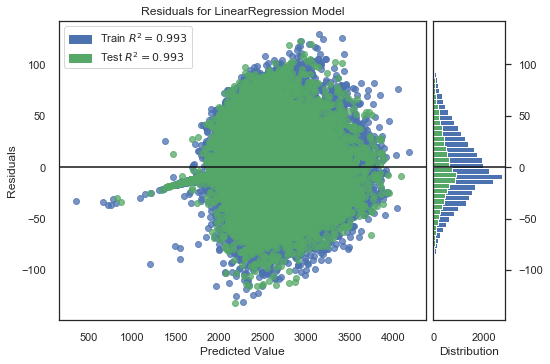

In [38]:
# solução 2: teste outra combinação
notas = ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
            'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4', 'nota_total']
regressao_completa_para(notas)


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_CN' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 402.6121907700537
********************************************************************************
r2 score 0.7905349220355158
mse 33950.50396098878
mae 136.7070588528916


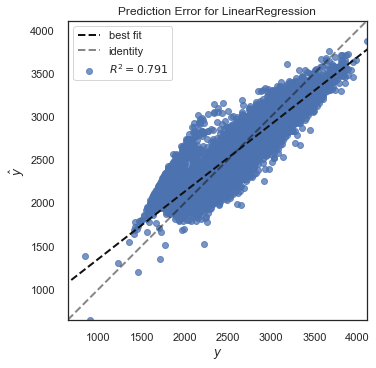

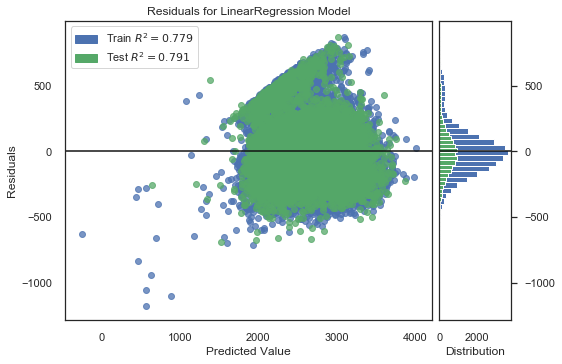

In [39]:
# solução 3: teste outra combinação

## 3 notas mais reelevantes que não têm haver com redação

notas = ["NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC", 'nota_total']
regressao_completa_para(notas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_COMP3' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 402.6121907700537
********************************************************************************
r2 score 0.8991958045282455
mse 16338.538485295207
mae 102.2037106009774


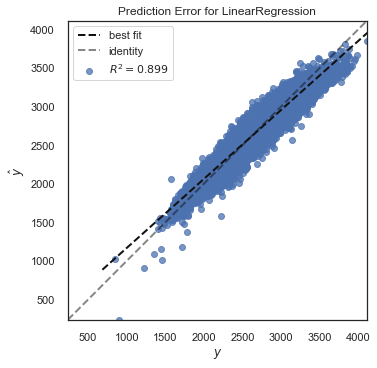

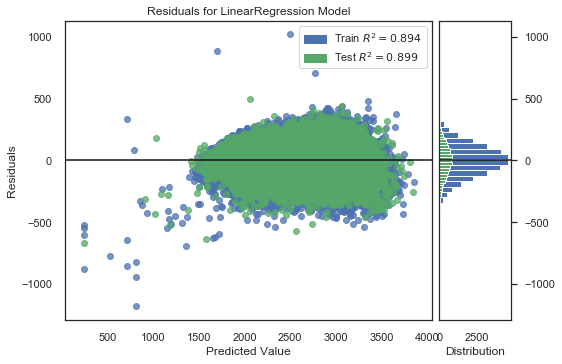

In [40]:
# solução 4: teste outra combinação

## 3 notas mais reelevantes
notas = ["NU_NOTA_CH", "NU_NOTA_COMP3", "NU_NOTA_LC", 'nota_total']
regressao_completa_para(notas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 2) (33200,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_CN'] como X
Desvio padrão do conjunto de testes 402.6121907700537
********************************************************************************
r2 score 0.7363575431210075
mse 42731.6780607825
mae 155.3483542849672


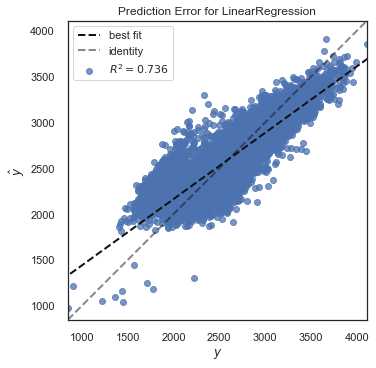

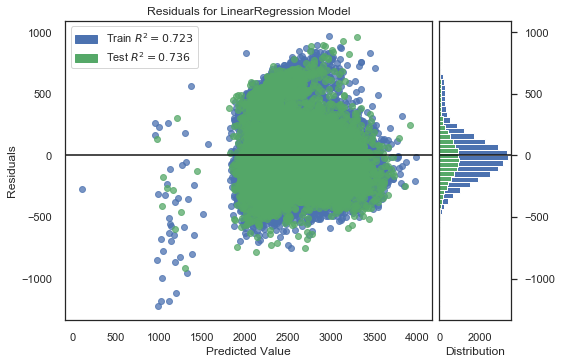

In [41]:
# solução 5: teste outra combinação

# Duas notas de áreas distantes
notas = ["NU_NOTA_CH", "NU_NOTA_CN", 'nota_total']
regressao_completa_para(notas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_COMP5' 'NU_NOTA_COMP2' 'NU_NOTA_COMP1'] como X
Desvio padrão do conjunto de testes 402.6121907700537
********************************************************************************
r2 score 0.6466860514072046
mse 57265.80644247593
mae 193.38556315870255


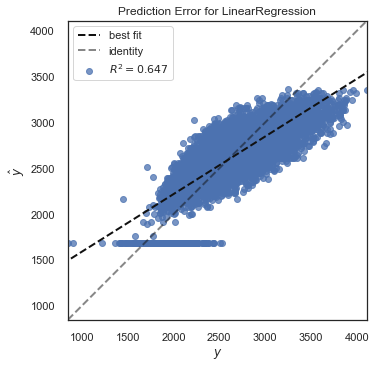

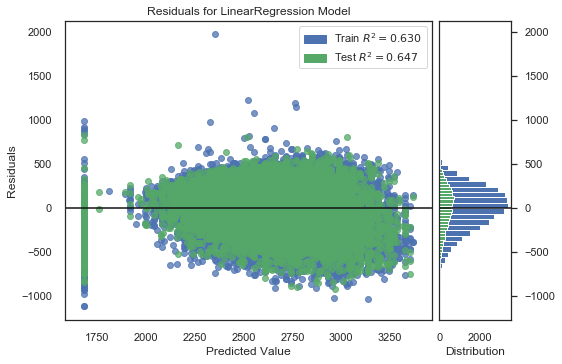

In [42]:
# solução 6: teste outra combinação

## 3 piores notas
notas = ["NU_NOTA_COMP5", "NU_NOTA_COMP2", "NU_NOTA_COMP1", 'nota_total']
regressao_completa_para(notas)

In [43]:
# solução 7: teste outra combinação



## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 402.6121907700537
********************************************************************************
r2 score 0.9280407091119037
mse 11663.300699415333
mae 85.68615244233696


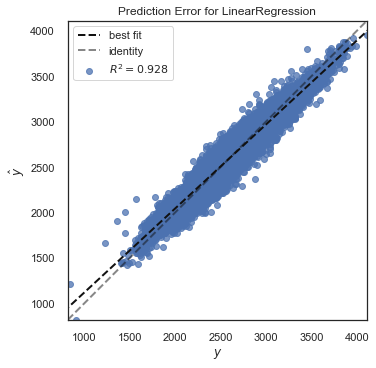

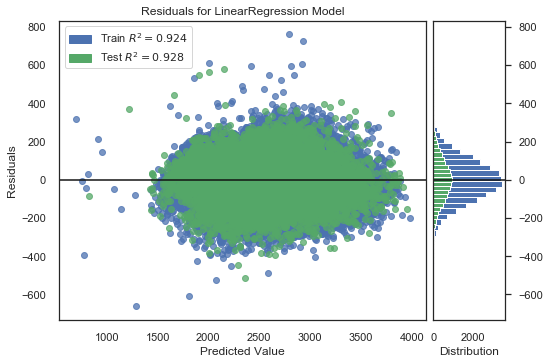

In [44]:
# solução
notas = ['NU_NOTA_LC', 'NU_NOTA_COMP3', 'NU_NOTA_MT', 'nota_total']
regressao_completa_para(notas)

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [45]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    # gere os modelos em uma lista
    modelos = [ LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor() ]
    return modelos

In [46]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [47]:
# solução
def escolhe_colunas(dados, colunas):
    return dados[colunas];

def escolhe_dados(dados, colunas):
    # extraia as colunas
    dados_x = escolhe_colunas(dados, colunas)
    # faça o split
    train_x, test_x, train_y, test_y = split(dados_x)
    # plote o histograma de train_y
    ax = sns.distplot(train_y)
    ax.set_title("Histograma dos dados de treino - test_y", fontsize = 16)
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [48]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo
    modelo.fit(train_x, train_y)
    
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    y_test_pred = modelo.predict(test_x)
    # calcule o mse
    mse = mean_squared_error(y_test_pred, test_y)
    # calcule o mae
    mae = mean_absolute_error(y_test_pred, test_y)
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [49]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        pipe = Pipeline([("Scaler", StandardScaler()), 
                         ("Modelo", modelo)])
        # use o make_pipeline ou crie um Pipeline
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 402.6121907700537


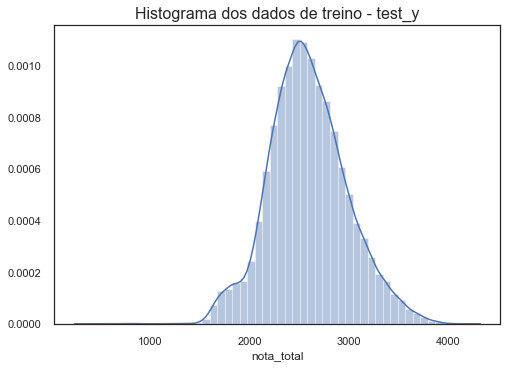

Resultado Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Modelo',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False) 11663.300699415331 85.68615244233695
Resultado Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Modelo',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False) 11668.626844129141 85.75138904502053
Resultado Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
           

,modelo,mse,mae,tempo_de_treino
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",11663.301,85.686,0.005
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",11668.627,85.751,0.410
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",11663.319,85.686,0.738
3,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",22206.690,117.685,0.125
4,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",13070.045,90.411,10.674


In [50]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

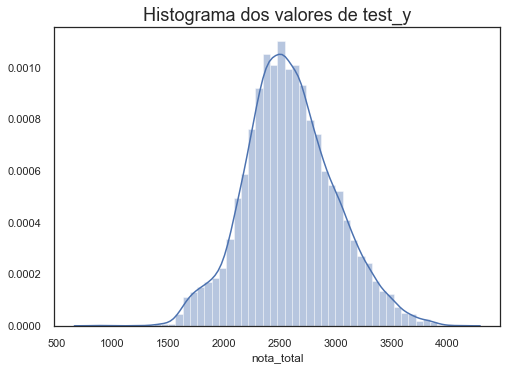

In [51]:
# solução: histograma
ax = sns.distplot(test_y)
ax.set_title("Histograma dos valores de test_y", fontsize = 18)
ax = ax

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [52]:
# solução

def top_p(serie, p = 0.75):
    # calcule o quantil p
    quant = serie.quantile(p)
    print("quantile encontrado", quant)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y = serie >= quant
    return y

In [53]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [54]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [55]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 2843.8


0.2501129484051685

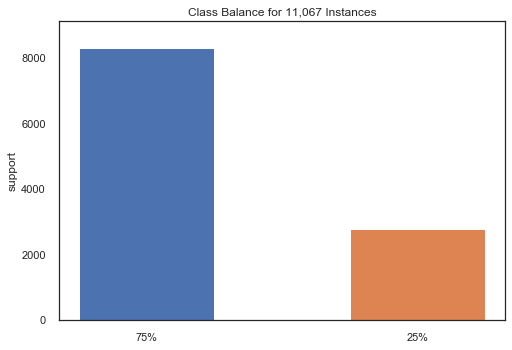

In [56]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

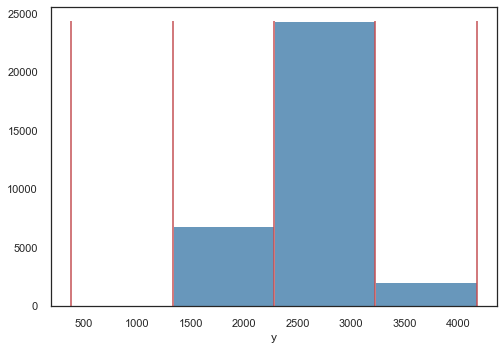

In [57]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [58]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [59]:
# solução

def gera_classificadores():
    # defina seus modelos
    modelos = [ DummyClassifier(strategy = "most_frequent"), LogisticRegression(), RidgeClassifier(),
               DecisionTreeClassifier(), RandomForestClassifier(), SVC() ]
    return modelos

In [60]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [61]:
def split_classificacao(dados):
    # faça o seed do numpy
    SEED = 42367
    # defina X como todas as colunas de `dados` exceto top_p
    X = dados.loc[:, dados.columns != 'top_p']
    # defina y como somente a coluna top_p
    y = dados['top_p']
    # quebre em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(X,y, random_state = SEED, stratify = y)
    
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [62]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total'])
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 2836.3500000000004
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Pergunta: implemente o treino e o teste do classificador

In [63]:
# solução:

import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine o pipeline
    pipe.fit(train_x, train_y)
    
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a accuracy_score
    accuracy_score = pipe.score(test_x, test_y)
    
    print("Resultado", nome, accuracy_score)

    return accuracy_score, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [64]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados[colunas] # selecione somente as colunas especificas de dados
    nota_total = dados['nota_total'] # somente a coluna nota_total
    interesse['top_p'] = pd.Series( top_p(nota_total, p) )# defina quem está no top p

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    sns.barplot(x = [0,1], y = [ (train_y == 0).sum(),train_y.sum() ])
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2836.3500000000004
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


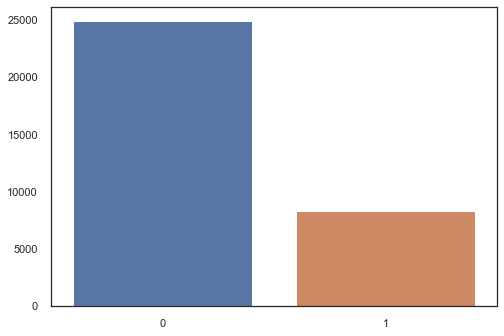

In [65]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [66]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2836.3500000000004
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


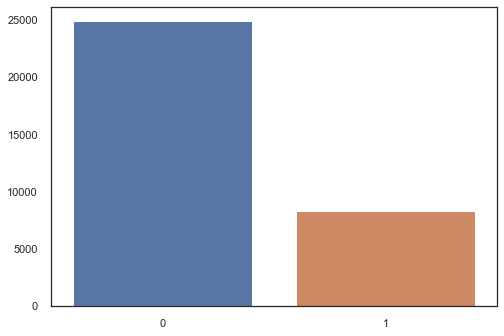

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9372910454504383
Resultado RidgeClassifier 0.9231047257612722
Resultado DecisionTreeClassifier 0.9050329809343092
Resultado RandomForestClassifier 0.9288876841059004
Resultado SVC 0.937381404174573


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.002
LogisticRegression,0.937,0.528
RidgeClassifier,0.923,0.174
DecisionTreeClassifier,0.905,0.227
RandomForestClassifier,0.929,3.235
SVC,0.937,7.443


In [67]:
# solução top 25%
p = 1.00 - 0.25
test_x, test_y, notas = analisa_classificacao( enem_eda, p )
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2910.4800000000005
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2000542152344809


C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


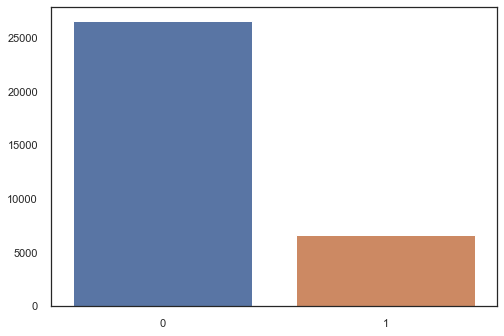

Resultado DummyClassifier 0.7999457847655191
Resultado LogisticRegression 0.946688352760459
Resultado RidgeClassifier 0.9258154874853167
Resultado DecisionTreeClassifier 0.9220204210716545
Resultado RandomForestClassifier 0.9391885786572693
Resultado SVC 0.9465076353121894


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.800,0.006
LogisticRegression,0.947,0.041
RidgeClassifier,0.926,0.011
DecisionTreeClassifier,0.922,0.075
RandomForestClassifier,0.939,2.440
SVC,0.947,5.942


In [68]:
# solução top 20%
p = 1.00 - 0.20
test_x, test_y, notas = analisa_classificacao( enem_eda, p )
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3114.78
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.10002710761724044


C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


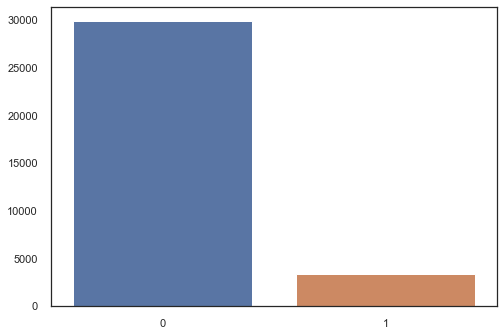

Resultado DummyClassifier 0.8999728923827596
Resultado LogisticRegression 0.9721695129664769
Resultado RidgeClassifier 0.9285262492093611
Resultado DecisionTreeClassifier 0.9597903677600073
Resultado RandomForestClassifier 0.9670190656907924
Resultado SVC 0.9719887955182073


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.900,0.009
LogisticRegression,0.972,0.104
RidgeClassifier,0.929,0.028
DecisionTreeClassifier,0.960,0.153
RandomForestClassifier,0.967,1.807
SVC,0.972,4.014


In [69]:
# solução top 10%
p = 1.00 - 0.10
test_x, test_y, notas = analisa_classificacao( enem_eda, p )
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3286.2699999999995
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.05005873317068763


C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


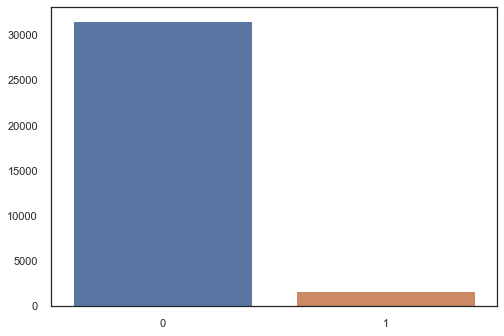

Resultado DummyClassifier 0.9499412668293123
Resultado LogisticRegression 0.9832836360350592
Resultado RidgeClassifier 0.9499412668293123
Resultado DecisionTreeClassifier 0.9766874491732177
Resultado RandomForestClassifier 0.9808439504834192
Resultado SVC 0.983373994759194


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.950,0.005
LogisticRegression,0.983,0.045
RidgeClassifier,0.950,0.011
DecisionTreeClassifier,0.977,0.049
RandomForestClassifier,0.981,1.728
SVC,0.983,2.458


In [70]:
# solução top 5%
p = 1.00 - 0.05
test_x, test_y, notas = analisa_classificacao( enem_eda, p )
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3589.267999999999
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.01002981837896449


C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


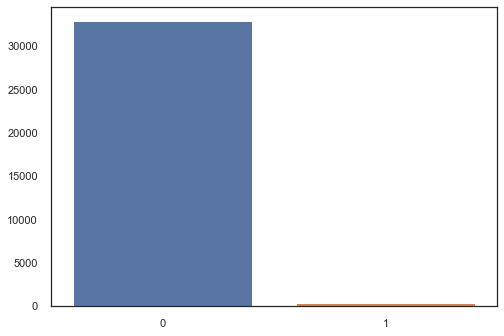

Resultado DummyClassifier 0.9899701816210356
Resultado LogisticRegression 0.9958434986897985
Resultado RidgeClassifier 0.9899701816210356
Resultado DecisionTreeClassifier 0.9942170416553718
Resultado RandomForestClassifier 0.9954820637932592
Resultado SVC 0.9958434986897985


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.990,0.004
LogisticRegression,0.996,0.055
RidgeClassifier,0.990,0.013
DecisionTreeClassifier,0.994,0.040
RandomForestClassifier,0.995,1.297
SVC,0.996,0.430


In [71]:
# solução top 1%
p = 1.00 - 0.01
test_x, test_y, notas = analisa_classificacao( enem_eda, p )
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2329.8
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


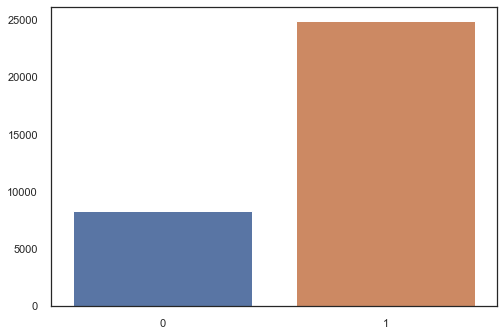

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9198518116924189
Resultado RidgeClassifier 0.9032258064516129
Resultado DecisionTreeClassifier 0.8886780518659076
Resultado RandomForestClassifier 0.9058462094515225
Resultado SVC 0.9191289418993404


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.008
LogisticRegression,0.920,0.078
RidgeClassifier,0.903,0.020
DecisionTreeClassifier,0.889,0.168
RandomForestClassifier,0.906,3.910
SVC,0.919,9.408


In [72]:
# solução bottom 25%
p = 0.25
test_x, test_y, notas = analisa_classificacao( enem_eda, p )
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 2836.3500000000004
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33200, 3) (33200,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


C:\Users\joaop\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


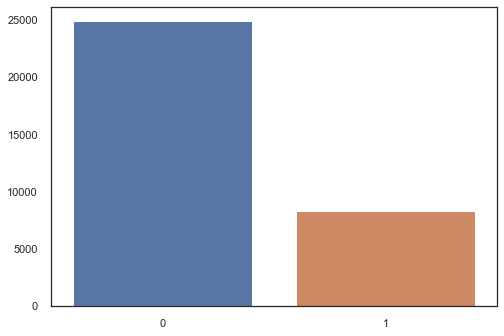

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9372910454504383
Resultado RidgeClassifier 0.9231047257612722
Resultado DecisionTreeClassifier 0.9048522634860395
Resultado RandomForestClassifier 0.9289780428300353
Resultado SVC 0.937381404174573


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.005
LogisticRegression,0.937,0.039
RidgeClassifier,0.923,0.012
DecisionTreeClassifier,0.905,0.092
RandomForestClassifier,0.929,3.793
SVC,0.937,6.715


In [73]:
# código pronto: rodando para top 25%
p = 1.00 - 0.25
test_x, test_y, notas = analisa_classificacao( enem_eda, p )
# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [74]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9372910454504383


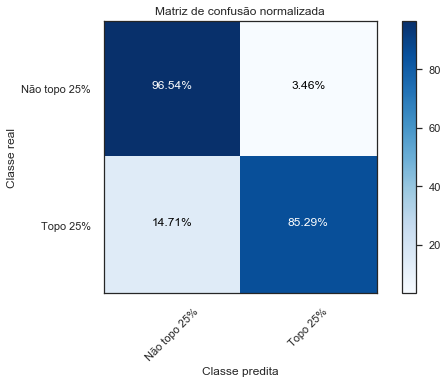

In [75]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.937381404174573


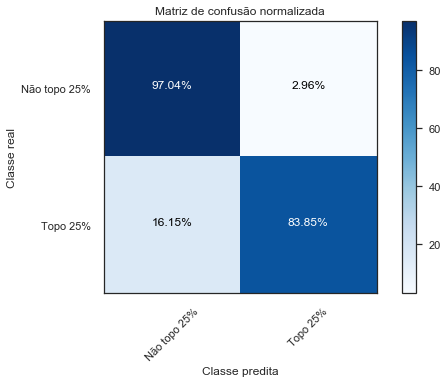

In [76]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [77]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382488 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [78]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[ ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"] ] # selecione as 3 colunas
    y = top_p(dados['nota_total'], 0.75) # calcule o top 25% como 1 o bottom 75% como 0
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [79]:
# solução

from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(dados)
    
    # calcule o cross_val_score
    scores = cross_val_score(modelo, X, y, 
                             groups=y, cv=5, 
                             n_jobs=-1, verbose=1)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2839.5
Média da validação 0.25004540799655356


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


Acurácia entre [93.48,93.49]
Acurácia do modelo em teste 0.9349885270649914


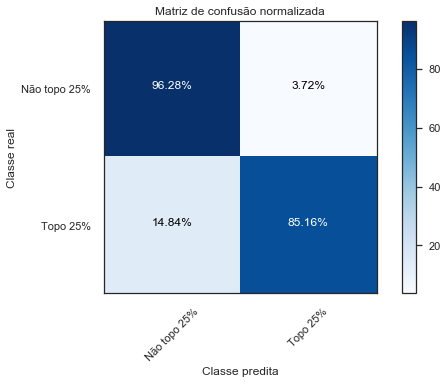

In [80]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [81]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.sum(axis=1)# some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.sum(axis=1)# some por coluna
        y_pred_true_false = ( parcial >= self.top_25_quantile )# compare a soma parcial com o self.top25_quantile
        y_pred = np.array( [ 1 if x else 0 for x in y_pred_true_false ] )# 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2839.5
Média da validação 0.25004540799655356


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.4s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


Acurácia entre [91.87,91.90]
top 25 quantile é 1247.90
Acurácia do modelo em teste 0.9184100447051994


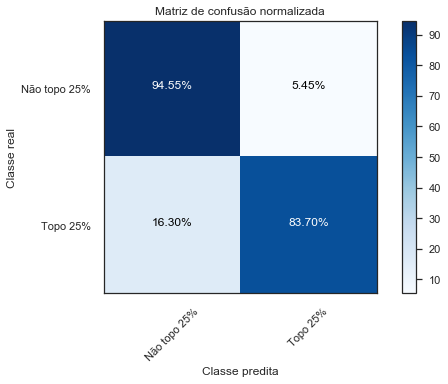

In [82]:

treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())


quantile encontrado 2839.5
Média da validação 0.25004540799655356


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished


Acurácia entre [62.47,62.48]


C:\Users\joaop\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Acurácia do modelo em teste 0.6251784374537934


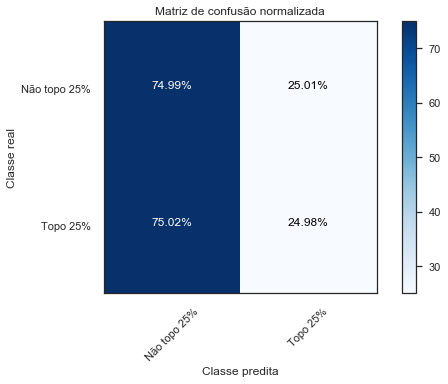

In [83]:

treina_e_valida_modelo_de_classificacao(enem_validacao, DummyClassifier())


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

    Ambos os modelos se mostram efetivamente melhores ou seja, mais precisos, que o Dummyclassifier() na classificação dos dois grupos. A heurística criada acima apresentou resultados tão satisfatórios quanto o modelo de regressão logística e pode ser uma boa alternativa.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    Para cada conjunto de notas calculamos um quantilie referente aos x% desejados e analisamos se o aluno está acima dos 3 quantilies calculados. 

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

    Ao julgar erroneamente um aluno como top 25% a faculdade pode oferecer uma bolsa pra um aluno inapto e gastar recursos com alguém com menos potencial. Quando julga erroneamente que alguém não está no top 25% pode deixar de efetuar um bom investimento e dar oportunidade a um provável bom aluno. 

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!